### Librerias

In [1]:
import credentials
import tweepy
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from tqdm import tqdm

### Api

In [2]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from utils.text_analysis import TextAnalysis

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Autentificación con Twitter

In [3]:
auth = tweepy.OAuthHandler(credentials.API_key, credentials.API_secret_key)
auth.set_access_token(credentials.Access_token, credentials.Access_token_secret)
api = tweepy.API(auth)

### Obtención de Tweets

In [4]:
twitterAccounts = ['@realDonaldTrump','@JoeBiden', '@BarackObama']
userTweets = []
tweetsPerPresidents = {}
numTweets = 0
numRT = 0
id = None
for account in tqdm(twitterAccounts):
    tweetsPerAccount = []
    for i in range(160):
        tweets = api.user_timeline(account, tweet_mode='extended', max_id=id)
        for tweet in tweets:
            numTweets += 1
            if tweet.full_text.startswith('RT'):
                numRT += 1
                continue
            userTweets.append(tweet.full_text)
            tweetsPerAccount.append(tweet.full_text)
        id = tweet.id 
    tweetsPerPresidents[account] = tweetsPerAccount
print('Cantidad Total de tweets: {}'.format(len(userTweets)))
print('Cantidad de Total ReTweets: {}'.format(numRT))
print('\n\n*** TWEETS POR CUENTA ***')
for key in tweetsPerPresidents:
    print('{} tweets para la cuenta {}.'.format(len(tweetsPerPresidents[key]), key))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:46<00:00, 75.67s/it]

Cantidad Total de tweets: 6521
Cantidad de Total ReTweets: 1167


*** TWEETS POR CUENTA ***
1297 tweets para la cuenta @realDonaldTrump.
2520 tweets para la cuenta @JoeBiden.
2704 tweets para la cuenta @BarackObama.


### Guardar Tweets en un txt

In [5]:
file = open('Tweets.txt', 'w+', encoding="utf-8")
for tweet in userTweets:
    file.write('{}\n'.format(tweet))
file.close()
print('Archivo de Tweets creado satisfactoriamente.')

Archivo de Tweets creado satisfactoriamente.


### Categorizar Tweets en Positivos, Neutros y Negativos

### De forma general

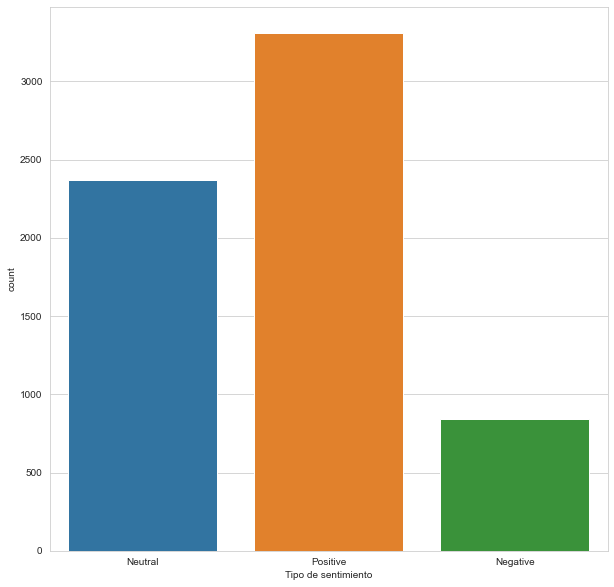

In [6]:
values = []
for tweets in userTweets:
    text = TextBlob(tweets)
    # los valores 'text' y 'text.sentiment.polarity' tienen que ir dentro de parentesis
    values.append((text, text.sentiment.polarity))

df =  pd.DataFrame(values, columns = ['sentence','sentiment'])

def f_title(df):
    if df['sentiment'] > 0:
        val = "Positive"
    elif df['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df['Tipo de sentimiento'] = df.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Tipo de sentimiento", data=df)
sentimentsXaccount = {}


### Donald Trump

Categorizacion para la cuenta @realDonaldTrump:




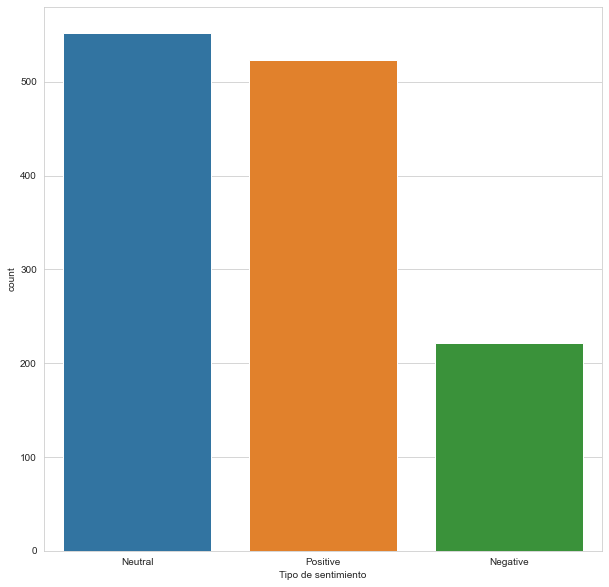

In [7]:
values.clear()
del df
print('Categorizacion para la cuenta @realDonaldTrump:\n\n')
for tweets in tweetsPerPresidents['@realDonaldTrump']:
    text = TextBlob(tweets)
    # los valores 'text' y 'text.sentiment.polarity' tienen que ir dentro de parentesis
    values.append((text, text.sentiment.polarity))

df =  pd.DataFrame(values, columns = ['sentence','sentiment'])

def f_title(df):
    if df['sentiment'] > 0:
        val = "Positive"
    elif df['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df['Tipo de sentimiento'] = df.apply(f_title, axis=1)
sentimentList = df['Tipo de sentimiento'].tolist()
sentimentsXaccount['@realDonaldTrump'] = [sentimentList.count('Positive'), sentimentList.count('Neutral'), sentimentList.count('Negative')]
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Tipo de sentimiento", data=df)

### Joe Biden

Categorizacion para la cuenta @JoeBiden:




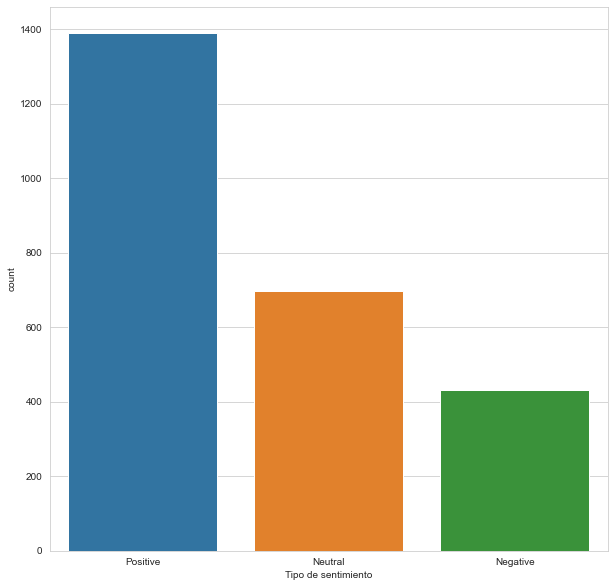

In [8]:
del df
values.clear()
print('Categorizacion para la cuenta @JoeBiden:\n\n')
for tweets in tweetsPerPresidents['@JoeBiden']:
    text = TextBlob(tweets)
    # los valores 'text' y 'text.sentiment.polarity' tienen que ir dentro de parentesis
    values.append((text, text.sentiment.polarity))

df =  pd.DataFrame(values, columns = ['sentence','sentiment'])

def f_title(df):
    if df['sentiment'] > 0:
        val = "Positive"
    elif df['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df['Tipo de sentimiento'] = df.apply(f_title, axis=1)
sentimentList = df['Tipo de sentimiento'].tolist()
sentimentsXaccount['@JoeBiden'] = [sentimentList.count('Positive'), sentimentList.count('Neutral'), sentimentList.count('Negative')]
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Tipo de sentimiento", data=df)

### Barack Obama

Categorizacion para la cuenta @BarackObama:




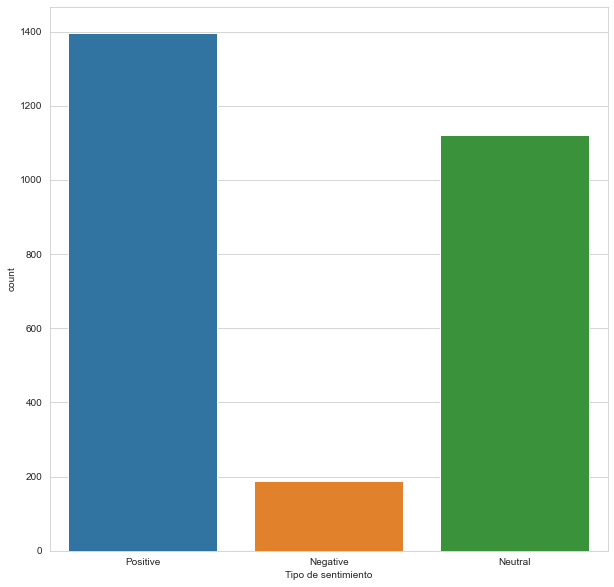

In [9]:
del df
values.clear()
print('Categorizacion para la cuenta @BarackObama:\n\n')
for tweets in tweetsPerPresidents['@BarackObama']:
    text = TextBlob(tweets)
    # los valores 'text' y 'text.sentiment.polarity' tienen que ir dentro de parentesis
    values.append((text, text.sentiment.polarity))

df =  pd.DataFrame(values, columns = ['sentence','sentiment'])

def f_title(df):
    if df['sentiment'] > 0:
        val = "Positive"
    elif df['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df['Tipo de sentimiento'] = df.apply(f_title, axis=1)
sentimentList = df['Tipo de sentimiento'].tolist()
sentimentsXaccount['@BarackObama'] = [sentimentList.count('Positive'), sentimentList.count('Neutral'), sentimentList.count('Negative')]
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Tipo de sentimiento", data=df)

### Porcentajes

In [10]:
print('*** PORCENTAJE DE EMOCIONALIDAD EN TWEETS *** \n')
for key in sentimentsXaccount:
    amount = len(tweetsPerPresidents[key])
    print('\nPara {}'.format(key))
    print('Numero total de tweets: {} \nPOS: {}   NEUT: {}   NEG: {}'.format(amount, sentimentsXaccount[key][0], sentimentsXaccount[key][1], sentimentsXaccount[key][2]))
    print('Porcentaje de tweets catalogados POSITIVOS: {}% \nPorcentaje de tweets catalogados NEUTROS: {}% \nPorcentaje de tweets catalogados NEGATIVOS: {}%'.format(((sentimentsXaccount[key][0] * 100)/amount), ((sentimentsXaccount[key][1] * 100)/amount), ((sentimentsXaccount[key][2] * 100)/amount)))

*** PORCENTAJE DE EMOCIONALIDAD EN TWEETS *** 


Para @realDonaldTrump
Numero total de tweets: 1297 
POS: 523   NEUT: 552   NEG: 222
Porcentaje de tweets catalogados POSITIVOS: 40.32382420971473% 
Porcentaje de tweets catalogados NEUTROS: 42.5597532767926% 
Porcentaje de tweets catalogados NEGATIVOS: 17.116422513492676%

Para @JoeBiden
Numero total de tweets: 2520 
POS: 1390   NEUT: 697   NEG: 433
Porcentaje de tweets catalogados POSITIVOS: 55.15873015873016% 
Porcentaje de tweets catalogados NEUTROS: 27.658730158730158% 
Porcentaje de tweets catalogados NEGATIVOS: 17.182539682539684%

Para @BarackObama
Numero total de tweets: 2704 
POS: 1396   NEUT: 1120   NEG: 188
Porcentaje de tweets catalogados POSITIVOS: 51.62721893491124% 
Porcentaje de tweets catalogados NEUTROS: 41.42011834319526% 
Porcentaje de tweets catalogados NEGATIVOS: 6.952662721893491%


### Palabras más usadas

In [11]:
nlp = spacy.load("en_core_web_md")

### Donald Trump

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1297/1297 [00:13<00:00, 94.36it/s]
C:\Users\dberr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


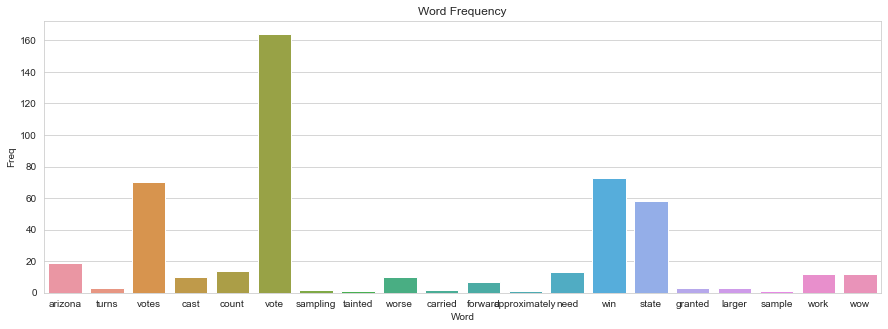

In [12]:
words = {}
for row in tqdm(tweetsPerPresidents['@realDonaldTrump']):
    doc = nlp(row.lower())
    for token in doc:
        if token.is_alpha and not token.is_stop:
            if token.text in words:
                num_temp = int(words[token.text])
                words[token.text] = num_temp + 1
            else:
                words[token.text] = 1
df_words = pd.DataFrame([[key, words[key]] for key in words.keys()], columns=['Word', 'Freq'])
df_words.sort_values('Freq').tail(15)
df_words = df_words[:20]
df_words.head(10)
plt.figure(figsize=(15,5))
sns.barplot(df_words['Word'].values, df_words['Freq'].values)
plt.title('Word Frequency')
plt.ylabel('Freq', fontsize=10)
plt.xlabel('Word', fontsize=10)
plt.show()

### Joe Biden

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2520/2520 [00:31<00:00, 80.11it/s]
C:\Users\dberr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


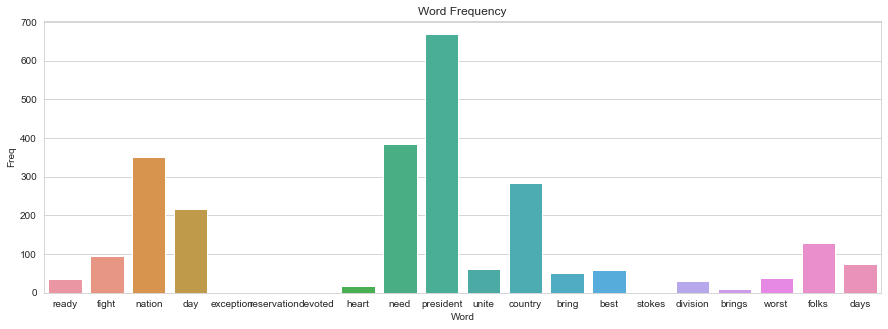

In [13]:
words = {}
for row in tqdm(tweetsPerPresidents['@JoeBiden']):
    doc = nlp(row.lower())
    for token in doc:
        if token.is_alpha and not token.is_stop:
            if token.text in words:
                num_temp = int(words[token.text])
                words[token.text] = num_temp + 1
            else:
                words[token.text] = 1
df_words = pd.DataFrame([[key, words[key]] for key in words.keys()], columns=['Word', 'Freq'])
df_words.sort_values('Freq').tail(15)
df_words = df_words[:20]
df_words.head(10)
plt.figure(figsize=(15,5))
sns.barplot(df_words['Word'].values, df_words['Freq'].values)
plt.title('Word Frequency')
plt.ylabel('Freq', fontsize=10)
plt.xlabel('Word', fontsize=10)
plt.show()

### Barack Obama

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2704/2704 [00:27<00:00, 97.82it/s]
C:\Users\dberr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


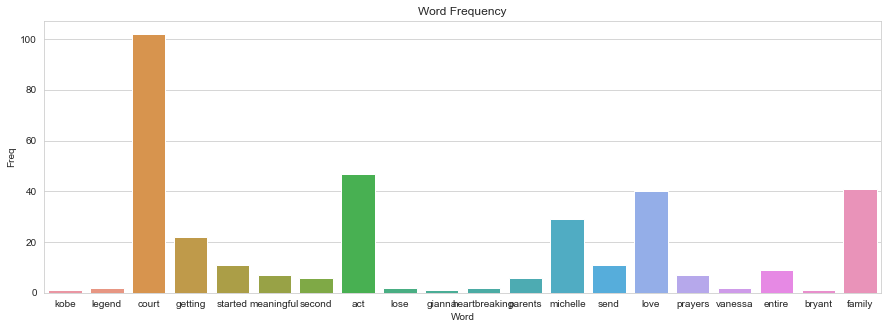

In [14]:
words = {}
for row in tqdm(tweetsPerPresidents['@BarackObama']):
    doc = nlp(row.lower())
    for token in doc:
        if token.is_alpha and not token.is_stop:
            if token.text in words:
                num_temp = int(words[token.text])
                words[token.text] = num_temp + 1
            else:
                words[token.text] = 1
df_words = pd.DataFrame([[key, words[key]] for key in words.keys()], columns=['Word', 'Freq'])
df_words.sort_values('Freq').tail(15)
df_words = df_words[:20]
df_words.head(10)
plt.figure(figsize=(15,5))
sns.barplot(df_words['Word'].values, df_words['Freq'].values)
plt.title('Word Frequency')
plt.ylabel('Freq', fontsize=10)
plt.xlabel('Word', fontsize=10)
plt.show()

In [15]:
ta = TextAnalysis('en')

Language: en
Text Analysis: ['emoji', 'tagger', 'parser', 'stemmer', 'ner']


### Obtener Metricas

In [16]:
def getMetrics(userTweets):
    setting = {'url': True, 'mention': True, 'emoji': True, 'hashtag': True, 'stopwords': False, 'relabel': True} 
    list_sentences = []

    for row in tqdm(userTweets):
        text = ta.clean_text(row, **setting)
        list_sentences.append(text)
        x = userTweets
        y = []

    for tweet in userTweets:
        text = TextBlob(tweet)
        polarity = text.sentiment.polarity
        y.append(polarity)

    def convertValuesToSentiments(y):
        sentiment = []
        for i in y:

            if i > 0:
                sentiment.append("Positive")
            elif i == 0:
                sentiment.append("Neutral")
            else:
                sentiment.append("Negative")
        return sentiment

    y = convertValuesToSentiments(y)
    #print('\nX: {}    Y: {}'.format(len(x), len(y)))
    #print('**Replica y_train:', sorted(Counter(y).items()))

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
    #print('\n\n**Replica train: {0}, size {1}'.format(sorted(Counter(y_train).items()), len(y_train)))
    #print('**Replica test: {0}, size {1}'.format(sorted(Counter(y_test).items()), len(y_test)))

    vec = CountVectorizer(min_df=5, ngram_range=(1,3), max_features=6517, strip_accents='unicode', analyzer='word')
    vec.fit(x_train)
    x_train = vec.transform(x_train)
    x_test = vec.transform(x_test)
    #print('\n\n',x_train.toarray())

    ros = RandomOverSampler(random_state=1000)
    x_train, y_train = ros.fit_resample(x_train, y_train)
    x_test, y_test = ros.fit_resample(x_test, y_test)
    #print('\n\n**RandomOverSampler train:', sorted(Counter(y_train).items()))
    #print('**RandomOverSampler test:', sorted(Counter(y_test).items()))

    classifier = LogisticRegression(C=10, solver='lbfgs', multi_class='multinomial',max_iter=1000) 
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print('\n',classification_report(y_test, y_pred))

    cv_score = np.mean(cross_val_score(classifier, x_train, y_train, cv=5, scoring='accuracy'))
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('\n\n **** METRICAS *****')
    print('\nAccuracy: {}%'.format(round(accuracy, 2)*100))
    print('Recall: {}%'.format(round(recall, 2)*100))
    print('Precision: {}%'.format(round(precision, 2)*100))
    print('F1: {}%'.format(round(f1, 2)*100))


### Mostrar metricas

### General

In [17]:
getMetrics(userTweets)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6521/6521 [00:00<00:00, 20678.17it/s]



               precision    recall  f1-score   support

    Negative       0.84      0.57      0.68       994
     Neutral       0.75      0.87      0.81       994
    Positive       0.73      0.85      0.79       994

    accuracy                           0.76      2982
   macro avg       0.77      0.76      0.76      2982
weighted avg       0.77      0.76      0.76      2982



 **** METRICAS *****

Accuracy: 76.0%
Recall: 76.0%
Precision: 77.0%
F1: 76.0%


### Donald Trump

In [18]:
getMetrics(tweetsPerPresidents['@realDonaldTrump'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1297/1297 [00:00<00:00, 14006.54it/s]



               precision    recall  f1-score   support

    Negative       0.77      0.53      0.63       161
     Neutral       0.80      0.93      0.86       161
    Positive       0.69      0.79      0.74       161

    accuracy                           0.75       483
   macro avg       0.75      0.75      0.74       483
weighted avg       0.75      0.75      0.74       483



 **** METRICAS *****

Accuracy: 75.0%
Recall: 75.0%
Precision: 75.0%
F1: 74.0%


### Joe Biden

In [19]:
getMetrics(tweetsPerPresidents['@JoeBiden'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2520/2520 [00:00<00:00, 16815.30it/s]



               precision    recall  f1-score   support

    Negative       0.83      0.62      0.71       414
     Neutral       0.79      0.71      0.75       414
    Positive       0.61      0.83      0.70       414

    accuracy                           0.72      1242
   macro avg       0.74      0.72      0.72      1242
weighted avg       0.74      0.72      0.72      1242



 **** METRICAS *****

Accuracy: 72.0%
Recall: 72.0%
Precision: 74.0%
F1: 72.0%


### Barack Obama

In [20]:
getMetrics(tweetsPerPresidents['@BarackObama'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2704/2704 [00:00<00:00, 13537.88it/s]



               precision    recall  f1-score   support

    Negative       0.84      0.45      0.59       433
     Neutral       0.65      0.84      0.73       433
    Positive       0.71      0.83      0.76       433

    accuracy                           0.71      1299
   macro avg       0.73      0.71      0.69      1299
weighted avg       0.73      0.71      0.69      1299



 **** METRICAS *****

Accuracy: 71.0%
Recall: 71.0%
Precision: 73.0%
F1: 69.0%
